#Step_1: Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step_2: loading data

In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/supply_chain_data.csv")


In [3]:
# Display data
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


#Step_3: Check and understand data

In [ ]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

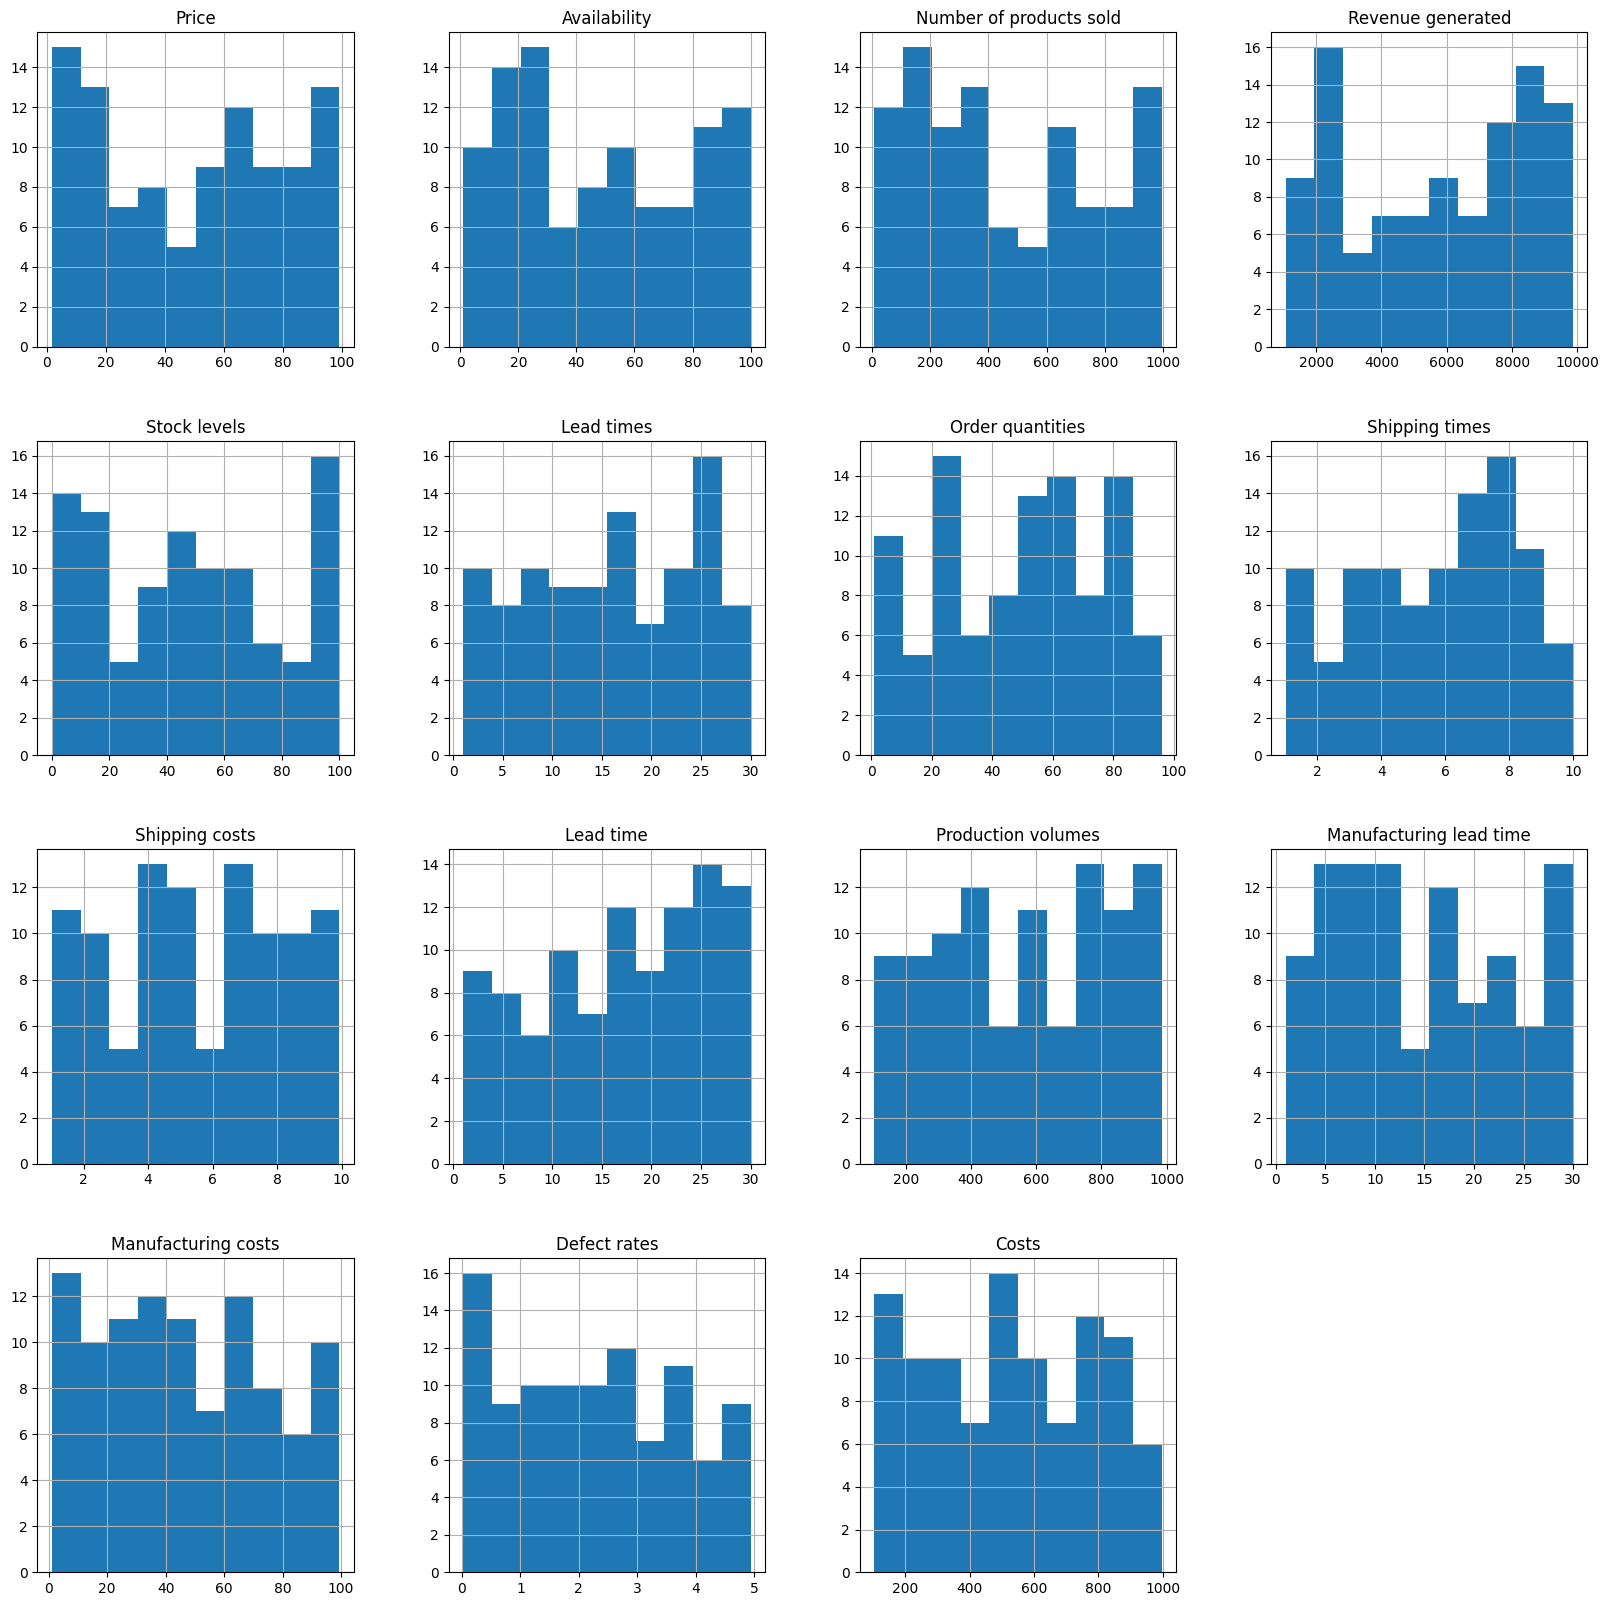

In [ ]:
#quick overview of the distribution of values in each numerical column.
df.hist(figsize=(20,20))
plt.show()

In [ ]:
# Display summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number of products sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stock levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


In [ ]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Product type,100,3,skincare,40
SKU,100,100,SKU0,1
Customer demographics,100,4,Unknown,31
Shipping carriers,100,3,Carrier B,43
Supplier name,100,5,Supplier 1,27
Location,100,5,Kolkata,25
Inspection results,100,3,Pending,41
Transportation modes,100,4,Road,29
Routes,100,3,Route A,43


#Step_4 : Exploratory Data Analysis (EDA) :-

>4.1:- Product Demand and Sales Analysis



In [ ]:
# Display unique values in the 'Product type' column
product_types = df['Product type'].unique()

# Print the types of products
print("Types of Products:")
for product_type in product_types:
    print(product_type)


Types of Products:
haircare
skincare
cosmetics


In [ ]:
total_items_by_product_type = df.groupby('Product type')['SKU'].count()
total_items_by_product_type

Product type
cosmetics    26
haircare     34
skincare     40
Name: SKU, dtype: int64

In [ ]:
# Group the data by product type and calculate the total number of products sold for each product type
total_items_by_product_type = df.groupby('Product type')['SKU'].count()

# Group the data by product type and get the unique SKUs for each product type
unique_skus_by_product_type = df.groupby('Product type')['SKU'].unique()

# Print the results
for product_type, total_items in total_items_by_product_type.items():
    print(f"product type : {product_type}")
    print(f"count of item : {total_items}")
    print(f"product's sku item :")
    for sku in unique_skus_by_product_type.loc[product_type]:
        print(sku)
    print("-------------------------------")

product type : cosmetics
count of item : 26
product's sku item :
SKU7
SKU8
SKU17
SKU21
SKU23
SKU27
SKU28
SKU29
SKU33
SKU35
SKU38
SKU44
SKU49
SKU50
SKU59
SKU62
SKU71
SKU72
SKU73
SKU85
SKU88
SKU89
SKU91
SKU92
SKU94
SKU96
-------------------------------
product type : haircare
count of item : 34
product's sku item :
SKU0
SKU2
SKU5
SKU12
SKU18
SKU22
SKU24
SKU25
SKU26
SKU30
SKU43
SKU45
SKU46
SKU48
SKU51
SKU54
SKU55
SKU57
SKU61
SKU68
SKU70
SKU74
SKU76
SKU77
SKU78
SKU79
SKU81
SKU83
SKU84
SKU87
SKU93
SKU95
SKU97
SKU99
-------------------------------
product type : skincare
count of item : 40
product's sku item :
SKU1
SKU3
SKU4
SKU6
SKU9
SKU10
SKU11
SKU13
SKU14
SKU15
SKU16
SKU19
SKU20
SKU31
SKU32
SKU34
SKU36
SKU37
SKU39
SKU40
SKU41
SKU42
SKU47
SKU52
SKU53
SKU56
SKU58
SKU60
SKU63
SKU64
SKU65
SKU66
SKU67
SKU69
SKU75
SKU80
SKU82
SKU86
SKU90
SKU98
-------------------------------


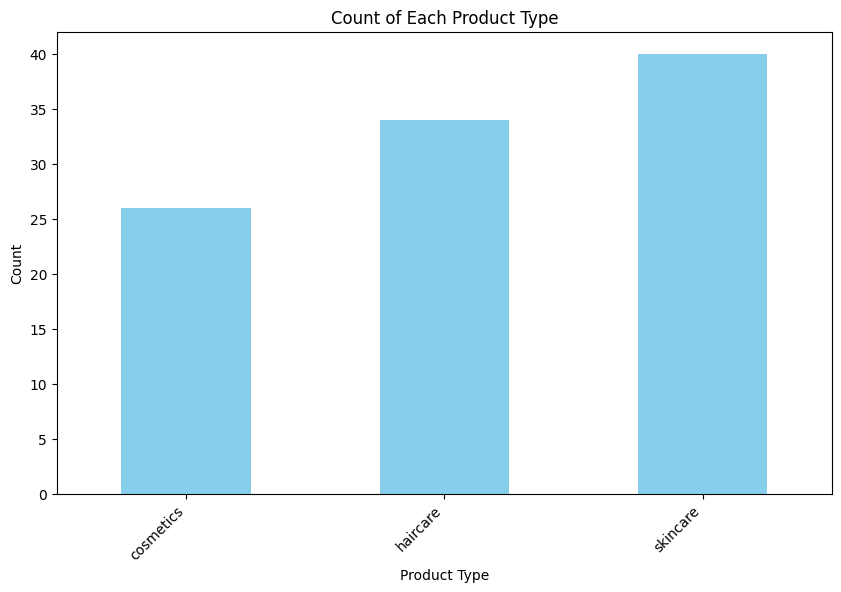

In [ ]:

# Group the data by product type and calculate the total count of each product type
total_items_by_product_type = df.groupby('Product type')['SKU'].count()

# Plot a bar chart
plt.figure(figsize=(10, 6))
total_items_by_product_type.plot(kind='bar', color='skyblue')
plt.title('Count of Each Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
# Find the highest and lowest prices along with their associated products
highest_price_item = df.loc[df['Price'].idxmax()]
lowest_price_item = df.loc[df['Price'].idxmin()]

# Display the results
print(f"Highest Price Item:")
print(f"Product Type: {highest_price_item['Product type']}")
print(f"SKU: {highest_price_item['SKU']}")
print(f"Price: ${highest_price_item['Price']:.2f}")

print("\n" + "="*30 + "\n")  # Separating the results

print(f"Lowest Price Item:")
print(f"Product Type: {lowest_price_item['Product type']}")
print(f"SKU: {lowest_price_item['SKU']}")
print(f"Price: ${lowest_price_item['Price']:.2f}")


Highest Price Item:
Product Type: skincare
SKU: SKU14
Price: $99.17


Lowest Price Item:
Product Type: haircare
SKU: SKU5
Price: $1.70


In [ ]:
# Top 10 highest prices
top_10_highest_prices = df.nlargest(10, 'Price')

# Bottom 10 lowest prices
bottom_10_lowest_prices = df.nsmallest(10, 'Price')

# Display the results
print("Top 10 highest prices:")
print(top_10_highest_prices[['Product type', 'SKU', 'Price']])

print("\nBottom 10 lowest prices:")
print(bottom_10_lowest_prices[['Product type', 'SKU', 'Price']])

Top 10 highest prices:
   Product type    SKU      Price
14     skincare  SKU14  99.171329
41     skincare  SKU41  99.113292
52     skincare  SKU52  98.031830
89    cosmetics  SKU89  97.760086
26     haircare  SKU26  97.446947
20     skincare  SKU20  96.341072
47     skincare  SKU47  95.712136
75     skincare  SKU75  92.996884
27    cosmetics  SKU27  92.557361
80     skincare  SKU80  91.128318

Bottom 10 lowest prices:
   Product type    SKU     Price
5      haircare   SKU5  1.699976
28    cosmetics  SKU28  2.397275
94    cosmetics  SKU94  3.037689
74     haircare  SKU74  3.170011
97     haircare  SKU97  3.526111
6      skincare   SKU6  4.078333
24     haircare  SKU24  4.156308
23    cosmetics  SKU23  4.324341
4      skincare   SKU4  4.805496
78     haircare  SKU78  6.306883


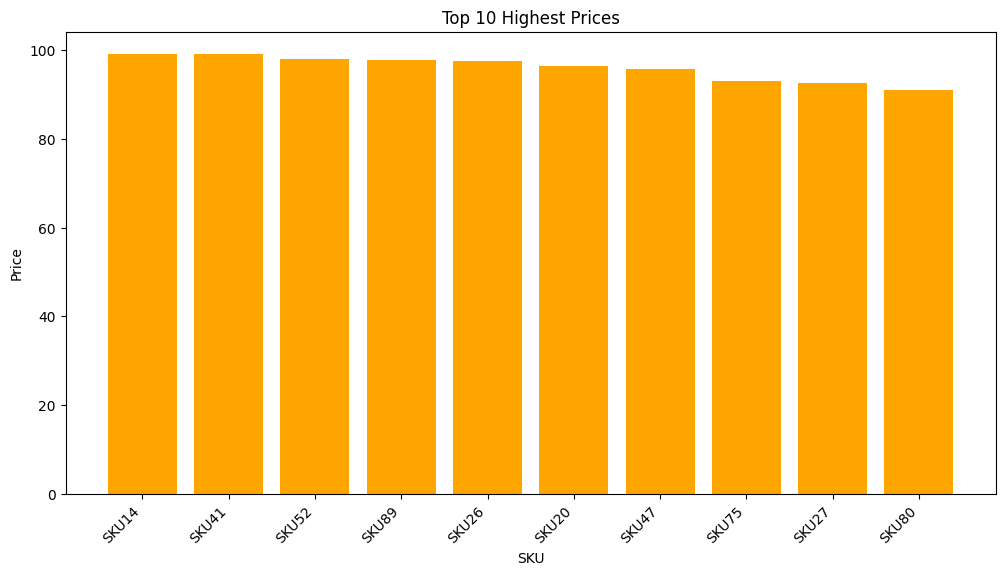

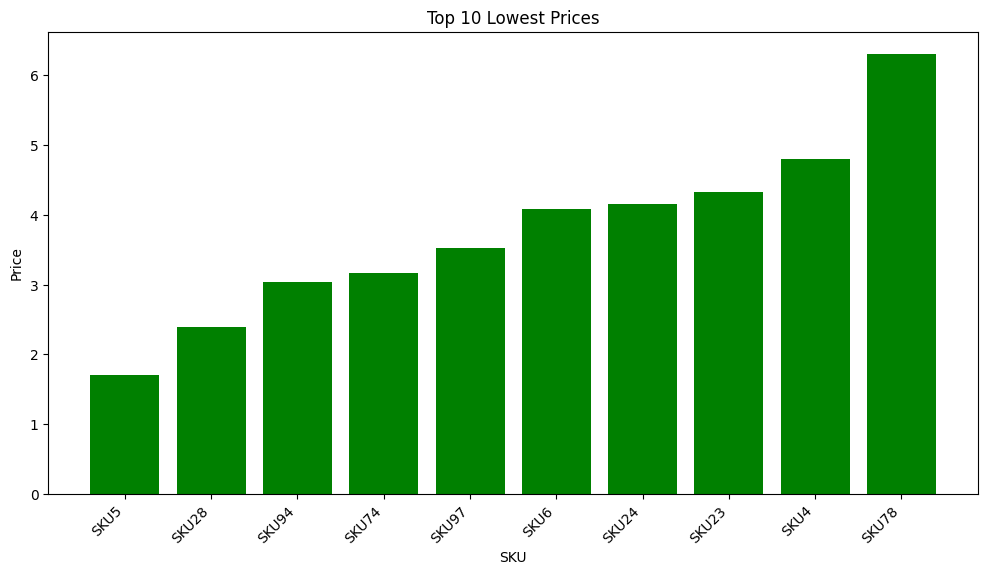

In [ ]:
# Find the top 10 highest and lowest prices along with their associated products
top_10_highest_prices = df.nlargest(10, 'Price')
top_10_lowest_prices = df.nsmallest(10, 'Price')

# Plot bar chart for top 10 highest prices
plt.figure(figsize=(12, 6))
plt.bar(top_10_highest_prices['SKU'], top_10_highest_prices['Price'], color='orange')
plt.title('Top 10 Highest Prices')
plt.xlabel('SKU')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot bar chart for top 10 lowest prices
plt.figure(figsize=(12, 6))
plt.bar(top_10_lowest_prices['SKU'], top_10_lowest_prices['Price'], color='green')
plt.title('Top 10 Lowest Prices')
plt.xlabel('SKU')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Find the top 10 products based on the number of items sold
top_10_products_sold = df.nlargest(10, 'Number of products sold')
# Display the result
print("Top 10 highest Products Sold:")
print(top_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])


Top 10 Products Sold:
   Product type    SKU      Price  Number of products sold
10     skincare  SKU10  15.707796                      996
94    cosmetics  SKU94   3.037689                      987
9      skincare   SKU9  64.015733                      980
36     skincare  SKU36   9.813003                      963
37     skincare  SKU37  23.399845                      963
11     skincare  SKU11  90.635460                      960
78     haircare  SKU78   6.306883                      946
40     skincare  SKU40  80.541424                      933
44    cosmetics  SKU44  51.355791                      919
91    cosmetics  SKU91  62.111965                      916


In [ ]:
# Find the lowest 10 products based on the number of items sold
top_10_products_sold = df.nsmallest(10, 'Number of products sold')

# Display the result
print("Top 10 lowest Products Sold:")
print(top_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])

Top 10 lowest Products Sold:
   Product type    SKU      Price  Number of products sold
2      haircare   SKU2  11.319683                        8
45     haircare  SKU45  33.784138                       24
85    cosmetics  SKU85  76.962994                       25
48     haircare  SKU48  76.035544                       29
70     haircare  SKU70  47.914542                       32
97     haircare  SKU97   3.526111                       62
6      skincare   SKU6   4.078333                       65
87     haircare  SKU87  80.414037                       79
3      skincare   SKU3  61.163343                       83
56     skincare  SKU56  20.986386                       93


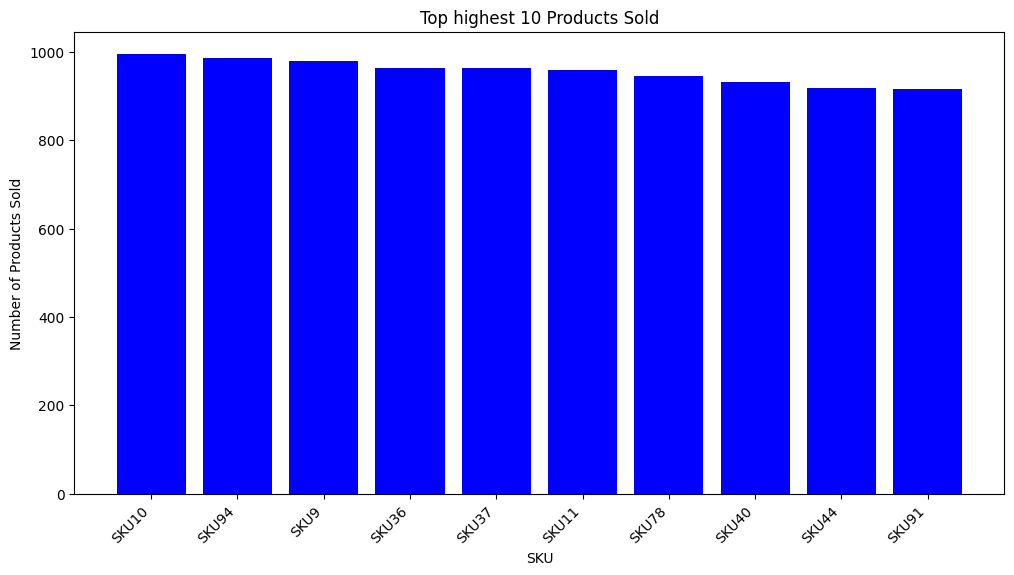

In [ ]:
import matplotlib.pyplot as plt

# Find the top 10 products based on the number of items sold
top_10_products_sold = df.nlargest(10, 'Number of products sold')

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_products_sold['SKU'], top_10_products_sold['Number of products sold'], color='blue')
plt.title('Top highest 10 Products Sold')
plt.xlabel('SKU')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


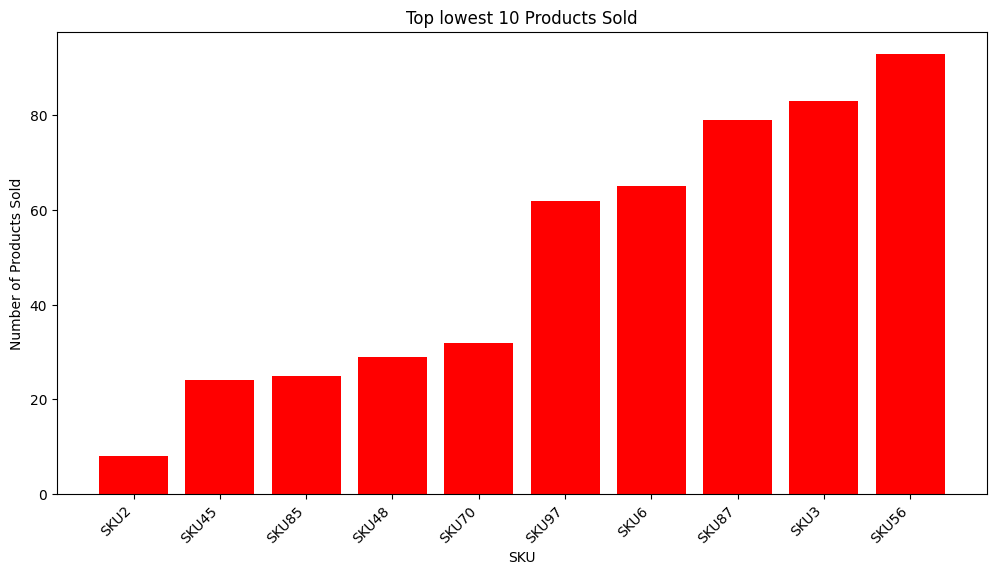

In [ ]:
import matplotlib.pyplot as plt

# Find the top 10 products based on the number of items sold
top_10_products_sold = df.nsmallest(10, 'Number of products sold')

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_products_sold['SKU'], top_10_products_sold['Number of products sold'], color='red')
plt.title('Top lowest 10 Products Sold')
plt.xlabel('SKU')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Find the top 10 highest and lowest revenue-generating products
top_10_highest_revenue = df.nlargest(10, 'Revenue generated')
top_10_lowest_revenue = df.nsmallest(10, 'Revenue generated')

# Display the results for the top 10 highest revenue
print("Top 10 Highest Revenue-Generating Products:")
print(top_10_highest_revenue[['Product type', 'SKU', 'Revenue generated']])
print("\n" + "="*30 + "\n")  # Separating the results

# Display the results for the top 10 lowest revenue
print("Top 10 Lowest Revenue-Generating Products:")
print(top_10_lowest_revenue[['Product type', 'SKU', 'Revenue generated']])


Top 10 Highest Revenue-Generating Products:
   Product type    SKU  Revenue generated
51     haircare  SKU51        9866.465458
38    cosmetics  SKU38        9692.318040
31     skincare  SKU31        9655.135103
90     skincare  SKU90        9592.633570
2      haircare   SKU2        9577.749626
32     skincare  SKU32        9571.550487
67     skincare  SKU67        9473.798033
88    cosmetics  SKU88        9444.742033
52     skincare  SKU52        9435.762609
18     haircare  SKU18        9364.673505


Top 10 Lowest Revenue-Generating Products:
   Product type    SKU  Revenue generated
59    cosmetics  SKU59        1061.618523
86     skincare  SKU86        1229.591029
78     haircare  SKU78        1292.458418
57     haircare  SKU57        1605.866900
69     skincare  SKU69        1752.381087
42     skincare  SKU42        1839.609426
75     skincare  SKU75        1889.073590
39     skincare  SKU39        1912.465663
91    cosmetics  SKU91        1935.206794
58     skincare  SKU58       

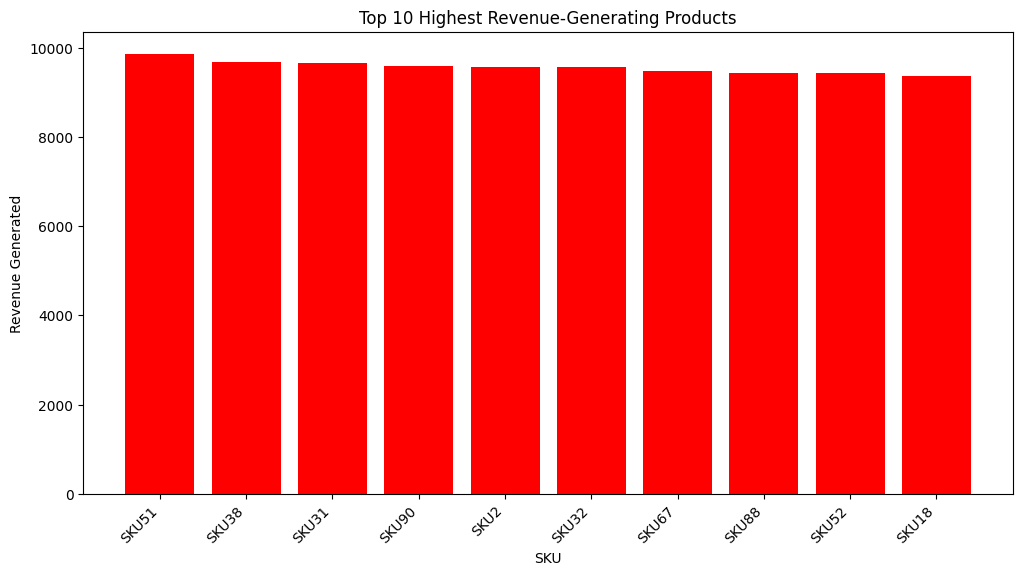

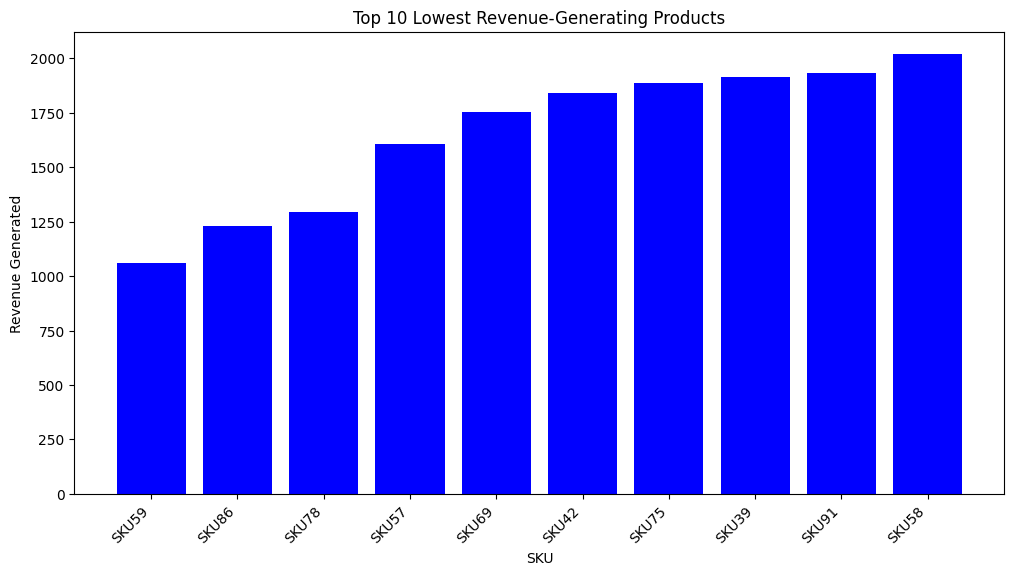

In [ ]:
import matplotlib.pyplot as plt

# Find the top 10 highest and lowest revenue-generating products
top_10_highest_revenue = df.nlargest(10, 'Revenue generated')
top_10_lowest_revenue = df.nsmallest(10, 'Revenue generated')

# Plot bar chart for top 10 highest revenue
plt.figure(figsize=(12, 6))
plt.bar(top_10_highest_revenue['SKU'], top_10_highest_revenue['Revenue generated'], color='red')
plt.title('Top 10 Highest Revenue-Generating Products')
plt.xlabel('SKU')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot bar chart for top 10 lowest revenue
plt.figure(figsize=(12, 6))
plt.bar(top_10_lowest_revenue['SKU'], top_10_lowest_revenue['Revenue generated'], color='blue')
plt.title('Top 10 Lowest Revenue-Generating Products')
plt.xlabel('SKU')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.show()


#Analyzing each product  :


#1-skincare_products :

Number of Skincare items = 40

Highest Price Item:
Product Type: skincare
SKU: SKU14
Price: $99.17


Lowest Price Item:
Product Type: skincare
SKU: SKU6
Price: $4.08

Top 10 Highest Prices:
   Product type    SKU      Price
14     skincare  SKU14  99.171329
41     skincare  SKU41  99.113292
52     skincare  SKU52  98.031830
20     skincare  SKU20  96.341072
47     skincare  SKU47  95.712136
75     skincare  SKU75  92.996884
80     skincare  SKU80  91.128318
11     skincare  SKU11  90.635460
64     skincare  SKU64  89.634096
67     skincare  SKU67  87.755432

Bottom 10 Lowest Prices:
   Product type    SKU      Price
6      skincare   SKU6   4.078333
4      skincare   SKU4   4.805496
16     skincare  SKU16   7.547172
36     skincare  SKU36   9.813003
63     skincare  SKU63  13.017377
90     skincare  SKU90  13.881913
1      skincare   SKU1  14.843523
10     skincare  SKU10  15.707796
13     skincare  SKU13  16.160393
60     skincare  SKU60  17.028028


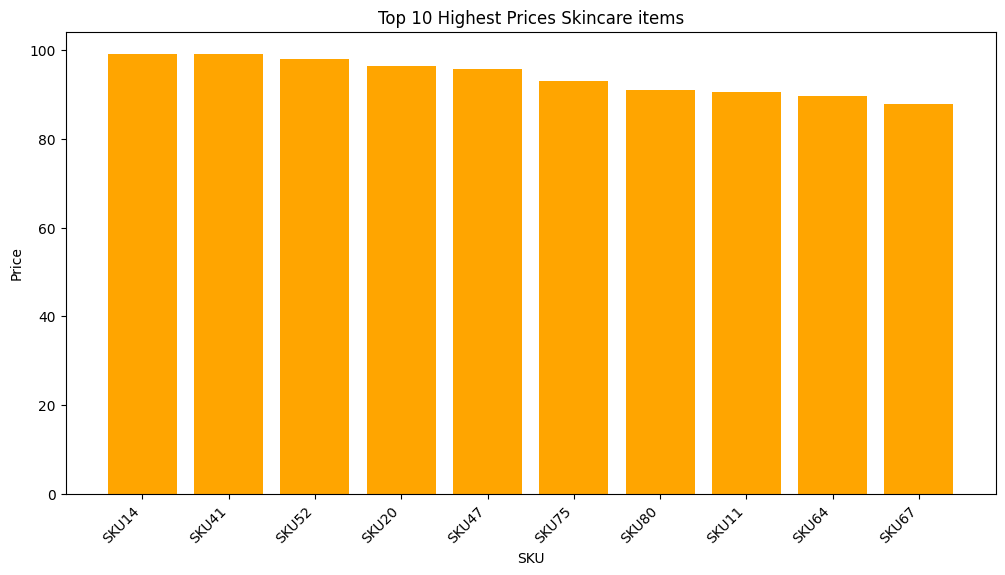

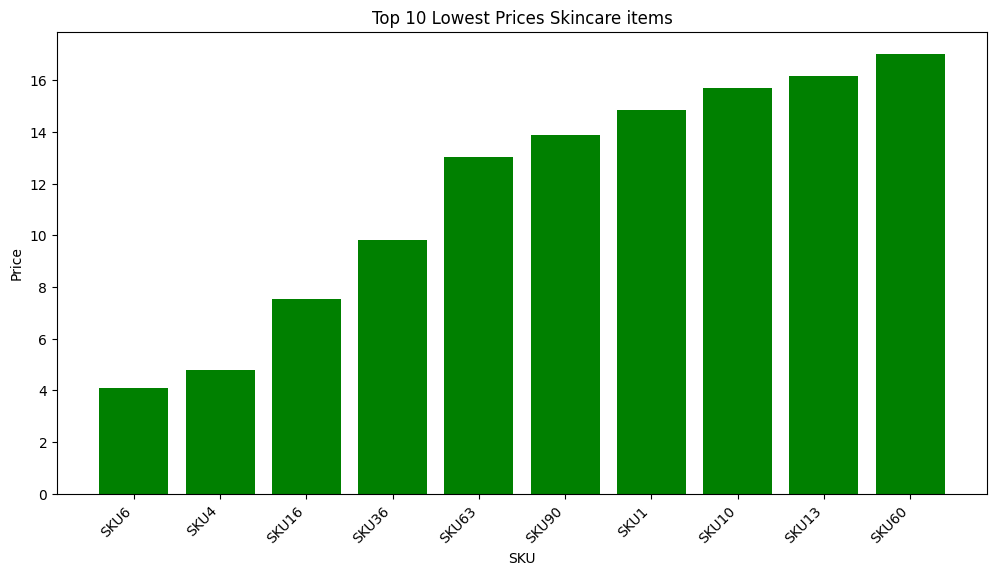

Top 10 highest Products Sold:
   Product type    SKU      Price  Number of products sold
10     skincare  SKU10  15.707796                      996
9      skincare   SKU9  64.015733                      980
36     skincare  SKU36   9.813003                      963
37     skincare  SKU37  23.399845                      963
11     skincare  SKU11  90.635460                      960
40     skincare  SKU40  80.541424                      933
98     skincare  SKU98  19.754605                      913
47     skincare  SKU47  95.712136                      910
58     skincare  SKU58  59.841561                      896
80     skincare  SKU80  91.128318                      872
Top 10 lowest Products Sold:
   Product type    SKU      Price  Number of products sold
6      skincare   SKU6   4.078333                       65
3      skincare   SKU3  61.163343                       83
56     skincare  SKU56  20.986386                       93
75     skincare  SKU75  92.996884                      1

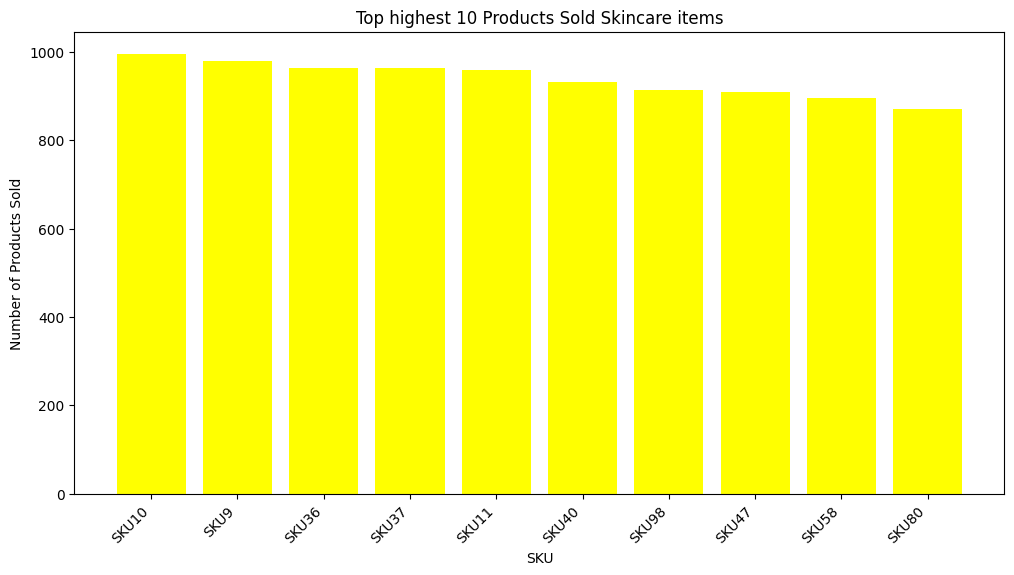

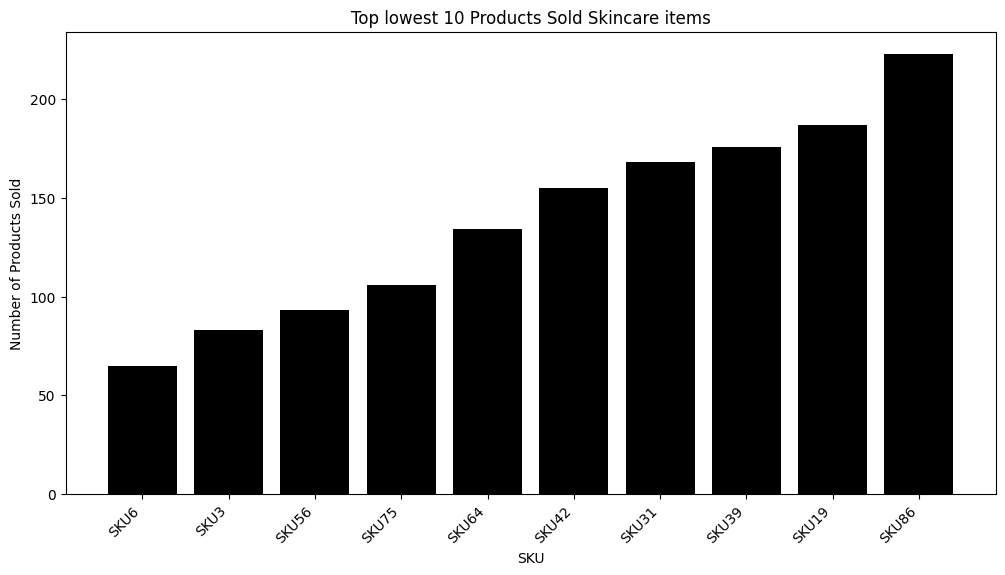


Top 10 Highest Revenue-Generating Products:
   Product type    SKU  Revenue generated
31     skincare  SKU31        9655.135103
90     skincare  SKU90        9592.633570
32     skincare  SKU32        9571.550487
67     skincare  SKU67        9473.798033
52     skincare  SKU52        9435.762609
34     skincare  SKU34        9061.710896
60     skincare  SKU60        8864.084350
14     skincare  SKU14        8653.570926
80     skincare  SKU80        8651.672683
98     skincare  SKU98        8525.952560


Top 10 Lowest Revenue-Generating Products:
   Product type    SKU  Revenue generated
86     skincare  SKU86        1229.591029
69     skincare  SKU69        1752.381087
42     skincare  SKU42        1839.609426
75     skincare  SKU75        1889.073590
39     skincare  SKU39        1912.465663
58     skincare  SKU58        2021.149810
10     skincare  SKU10        2330.965802
37     skincare  SKU37        2438.339930
19     skincare  SKU19        2553.495585
4      skincare   SKU4      

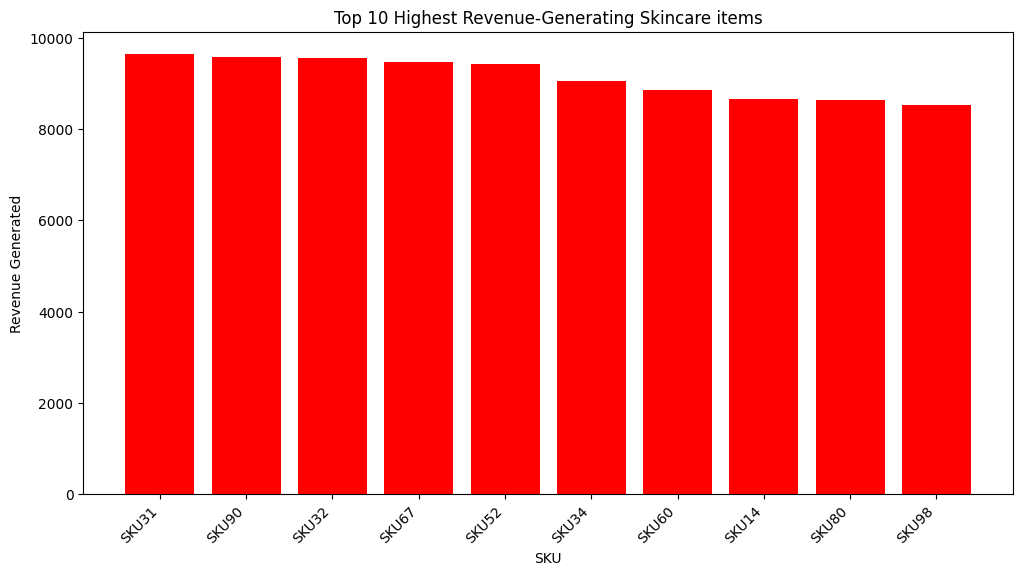

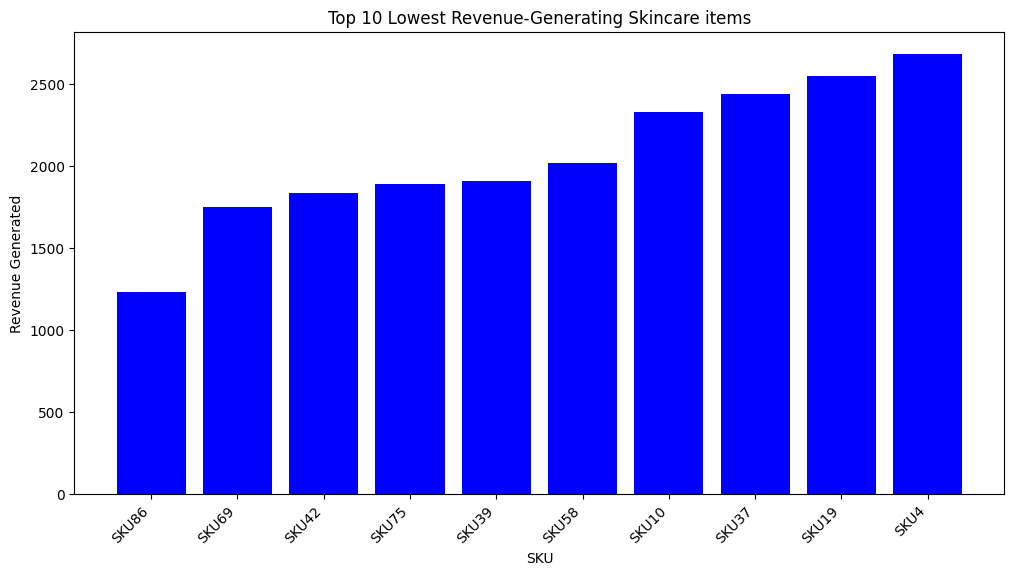

In [63]:
def analyze_skincare_products(df):
    # Using boolean indexing to filter rows where 'Product type' is 'skincare'
    skincare_df = df[df['Product type'] == 'skincare']

    # Grouping by 'Product type' and counting the number of unique SKUs for each group
    count_of_products_by_type = skincare_df.groupby('Product type')['SKU'].count()

    # Get the count as an integer
    number_of_items = count_of_products_by_type.values[0]

    # Number of items
    print(f"Number of Skincare items = {number_of_items}")

    # Find the highest and lowest prices for skincare products
    highest_price_item = skincare_df.loc[skincare_df['Price'].idxmax()]
    lowest_price_item = skincare_df.loc[skincare_df['Price'].idxmin()]

    # Display the results
    print("\nHighest Price Item:")
    print(f"Product Type: {highest_price_item['Product type']}")
    print(f"SKU: {highest_price_item['SKU']}")
    print(f"Price: ${highest_price_item['Price']:.2f}")

    print("\n" + "="*30 + "\n")  # Separating the results

    print("Lowest Price Item:")
    print(f"Product Type: {lowest_price_item['Product type']}")
    print(f"SKU: {lowest_price_item['SKU']}")
    print(f"Price: ${lowest_price_item['Price']:.2f}")

    # Top 10 highest prices
    top_10_highest_prices = skincare_df.nlargest(10, 'Price')

    # Bottom 10 lowest prices
    bottom_10_lowest_prices = skincare_df.nsmallest(10, 'Price')

    # Display the results
    print("\nTop 10 Highest Prices:")
    print(top_10_highest_prices[['Product type', 'SKU', 'Price']])

    print("\nBottom 10 Lowest Prices:")
    print(bottom_10_lowest_prices[['Product type', 'SKU', 'Price']])

    # Find the top 10 highest and lowest prices along with their associated products
    top_10_highest_prices = skincare_df.nlargest(10, 'Price')
    top_10_lowest_prices = skincare_df.nsmallest(10, 'Price')

    # Plot bar chart for top 10 highest prices
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_highest_prices['SKU'], top_10_highest_prices['Price'], color='orange')
    plt.title('Top 10 Highest Prices Skincare items')
    plt.xlabel('SKU')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Plot bar chart for top 10 lowest prices
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_lowest_prices['SKU'], top_10_lowest_prices['Price'], color='green')
    plt.title('Top 10 Lowest Prices Skincare items')
    plt.xlabel('SKU')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    ###########################################################################
    # Find the top 10 products based on the number of items sold
    Highest_10_products_sold = skincare_df.nlargest(10, 'Number of products sold')
    # Display the result
    print("Top 10 highest Products Sold:")
    print(Highest_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])

    # Find the lowest  10 products based on the number of items sold
    lowest_10_products_sold = skincare_df.nsmallest(10, 'Number of products sold')
    # Display the result
    print("Top 10 lowest Products Sold:")
    print(lowest_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])



    # Find the top 10 products based on the number of items sold
    top_10_products_sold = skincare_df.nlargest(10, 'Number of products sold')

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_products_sold['SKU'], top_10_products_sold['Number of products sold'], color='yellow')
    plt.title('Top highest 10 Products Sold Skincare items')
    plt.xlabel('SKU')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Find the lowest 10 products based on the number of items sold
    lowest_10_products_sold = skincare_df.nsmallest(10, 'Number of products sold')

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(lowest_10_products_sold['SKU'], lowest_10_products_sold['Number of products sold'], color='black')
    plt.title('Top lowest 10 Products Sold Skincare items')
    plt.xlabel('SKU')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45, ha='right')
    plt.show()
   ###########################################################################
    # Find the top 10 highest and lowest revenue-generating items for skincare products
    top_10_highest_revenue = skincare_df.nlargest(10, 'Revenue generated')
    top_10_lowest_revenue = skincare_df.nsmallest(10, 'Revenue generated')

    # Display the results for the top 10 highest revenue
    print("\nTop 10 Highest Revenue-Generating Products:")
    print(top_10_highest_revenue[['Product type', 'SKU', 'Revenue generated']])
    print("\n" + "="*30 + "\n")  # Separating the results

    # Display the results for the top 10 lowest revenue
    print("Top 10 Lowest Revenue-Generating Products:")
    print(top_10_lowest_revenue[['Product type', 'SKU', 'Revenue generated']])

    # Plot bar chart for top 10 highest revenue
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_highest_revenue['SKU'], top_10_highest_revenue['Revenue generated'], color='red')
    plt.title('Top 10 Highest Revenue-Generating Skincare items')
    plt.xlabel('SKU')
    plt.ylabel('Revenue Generated')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Plot bar chart for top 10 lowest revenue
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_lowest_revenue['SKU'], top_10_lowest_revenue['Revenue generated'], color='blue')
    plt.title('Top 10 Lowest Revenue-Generating Skincare items')
    plt.xlabel('SKU')
    plt.ylabel('Revenue Generated')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Call the function to analyze skincare products
analyze_skincare_products(df)


#2-haircare_products

Number of Haircare items = 34

Highest Price Item:
Product Type: haircare
SKU: SKU26
Price: $97.45


Lowest Price Item:
Product Type: haircare
SKU: SKU5
Price: $1.70

Top 10 Highest Prices:
   Product type    SKU      Price
26     haircare  SKU26  97.446947
84     haircare  SKU84  89.104367
87     haircare  SKU87  80.414037
55     haircare  SKU55  79.855058
95     haircare  SKU95  77.903927
48     haircare  SKU48  76.035544
81     haircare  SKU81  72.819207
12     haircare  SKU12  71.213389
0      haircare   SKU0  69.808006
93     haircare  SKU93  69.290831

Bottom 10 Lowest Prices:
   Product type    SKU      Price
5      haircare   SKU5   1.699976
74     haircare  SKU74   3.170011
97     haircare  SKU97   3.526111
24     haircare  SKU24   4.156308
78     haircare  SKU78   6.306883
30     haircare  SKU30   8.022859
2      haircare   SKU2  11.319683
43     haircare  SKU43  11.743272
51     haircare  SKU51  26.700761
46     haircare  SKU46  27.082207


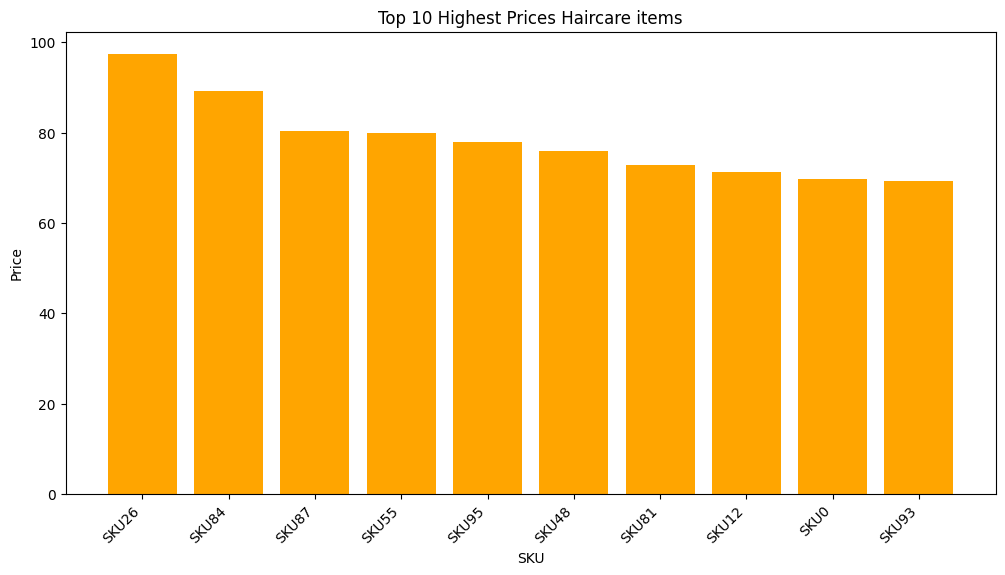

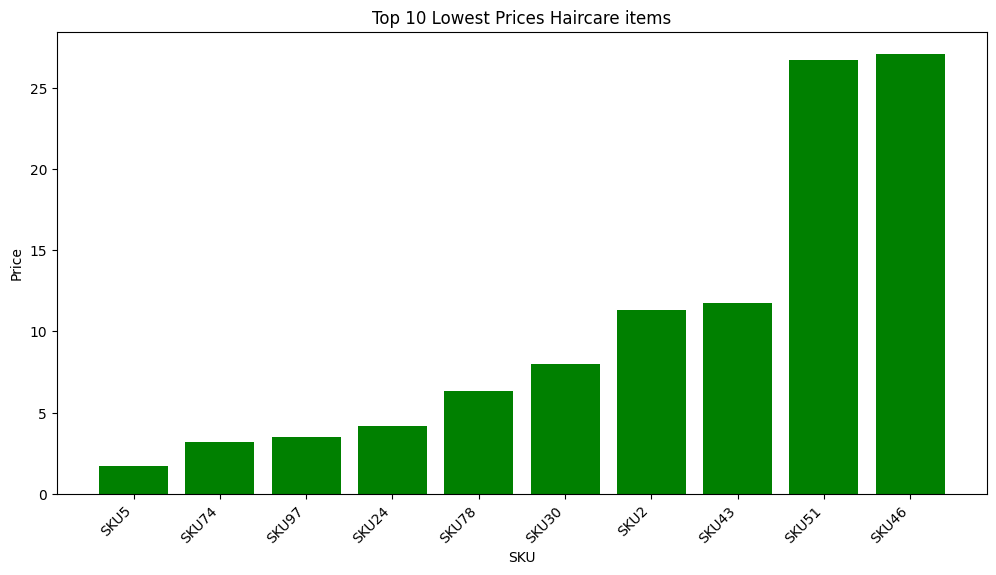

Top 10 highest Products Sold:
   Product type    SKU      Price  Number of products sold
78     haircare  SKU78   6.306883                      946
74     haircare  SKU74   3.170011                      904
22     haircare  SKU22  27.679781                      884
46     haircare  SKU46  27.082207                      859
0      haircare   SKU0  69.808006                      802
81     haircare  SKU81  72.819207                      774
55     haircare  SKU55  79.855058                      701
95     haircare  SKU95  77.903927                      672
83     haircare  SKU83  68.911246                      663
99     haircare  SKU99  68.517833                      627
Top 10 lowest Products Sold:
   Product type    SKU      Price  Number of products sold
2      haircare   SKU2  11.319683                        8
45     haircare  SKU45  33.784138                       24
48     haircare  SKU48  76.035544                       29
70     haircare  SKU70  47.914542                       

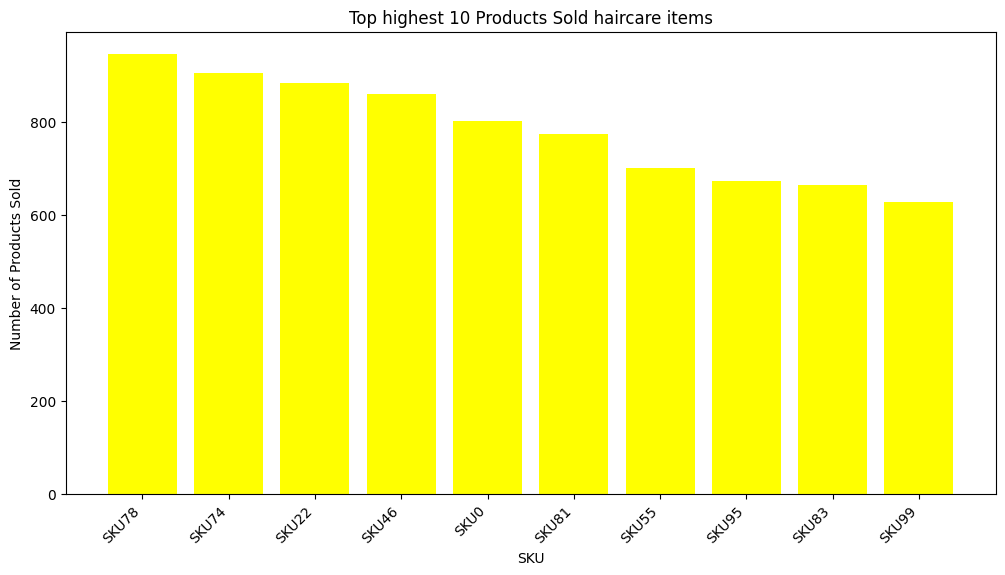

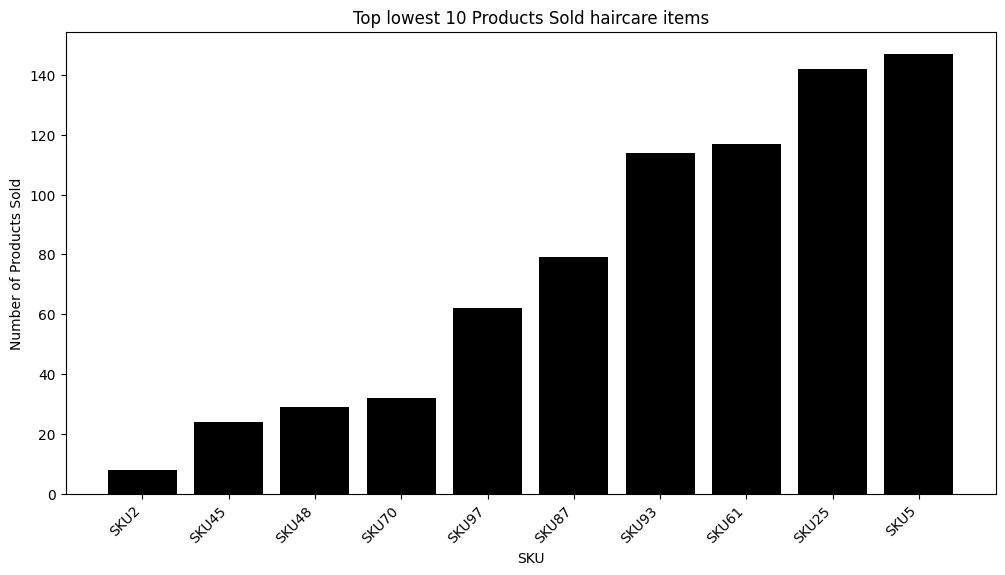


Top 10 Highest Revenue-Generating Products:
   Product type    SKU  Revenue generated
51     haircare  SKU51        9866.465458
2      haircare   SKU2        9577.749626
18     haircare  SKU18        9364.673505
99     haircare  SKU99        9185.185829
24     haircare  SKU24        9049.077861
0      haircare   SKU0        8661.996792
79     haircare  SKU79        7888.723268
48     haircare  SKU48        7397.071005
95     haircare  SKU95        7386.363944
70     haircare  SKU70        7014.887987


Top 10 Lowest Revenue-Generating Products:
   Product type    SKU  Revenue generated
78     haircare  SKU78        1292.458418
57     haircare  SKU57        1605.866900
84     haircare  SKU84        2048.290100
25     haircare  SKU25        2174.777054
22     haircare  SKU22        2390.807867
83     haircare  SKU83        2411.754632
77     haircare  SKU77        2483.760178
46     haircare  SKU46        2556.767361
30     haircare  SKU30        2766.342367
5      haircare   SKU5      

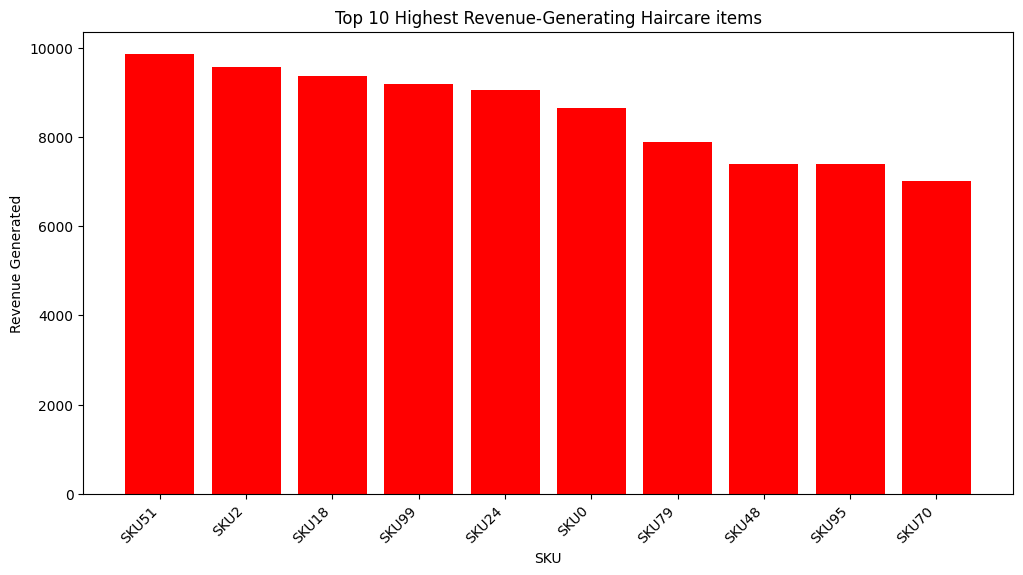

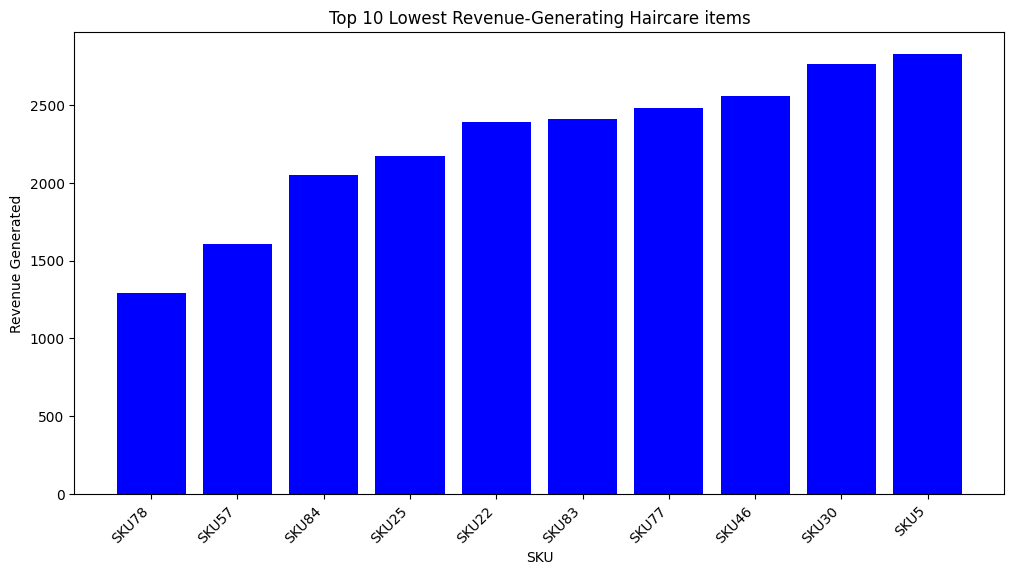

In [61]:
def analyze_haircare_products(df):
    # Using boolean indexing to filter rows where 'Product type' is 'haircare'
    haircare_df = df[df['Product type'] == 'haircare']

    # Grouping by 'Product type' and counting the number of unique SKUs for each group
    count_of_products_by_type = haircare_df.groupby('Product type')['SKU'].count()

    # Get the count as an integer
    number_of_items = count_of_products_by_type.values[0]

    # Number of items
    print(f"Number of Haircare items = {number_of_items}")
   #######################################################################
    # Find the highest and lowest prices for haircare products
    highest_price_item = haircare_df.loc[haircare_df['Price'].idxmax()]
    lowest_price_item = haircare_df.loc[haircare_df['Price'].idxmin()]

    # Display the results
    print("\nHighest Price Item:")
    print(f"Product Type: {highest_price_item['Product type']}")
    print(f"SKU: {highest_price_item['SKU']}")
    print(f"Price: ${highest_price_item['Price']:.2f}")

    print("\n" + "="*30 + "\n")  # Separating the results

    print("Lowest Price Item:")
    print(f"Product Type: {lowest_price_item['Product type']}")
    print(f"SKU: {lowest_price_item['SKU']}")
    print(f"Price: ${lowest_price_item['Price']:.2f}")

    ###########################################################################

    # Top 10 highest prices
    top_10_highest_prices = haircare_df.nlargest(10, 'Price')

    # Bottom 10 lowest prices
    bottom_10_lowest_prices = haircare_df.nsmallest(10, 'Price')

    # Display the results
    print("\nTop 10 Highest Prices:")
    print(top_10_highest_prices[['Product type', 'SKU', 'Price']])

    print("\nBottom 10 Lowest Prices:")
    print(bottom_10_lowest_prices[['Product type', 'SKU', 'Price']])

    # Find the top 10 highest and lowest prices along with their associated products
    top_10_highest_prices = haircare_df.nlargest(10, 'Price')
    top_10_lowest_prices = haircare_df.nsmallest(10, 'Price')

    # Plot bar chart for top 10 highest prices
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_highest_prices['SKU'], top_10_highest_prices['Price'], color='orange')
    plt.title('Top 10 Highest Prices Haircare items')
    plt.xlabel('SKU')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Plot bar chart for top 10 lowest prices
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_lowest_prices['SKU'], top_10_lowest_prices['Price'], color='green')
    plt.title('Top 10 Lowest Prices Haircare items')
    plt.xlabel('SKU')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    ###########################################################################
    # Find the top 10 products based on the number of items sold
    Highest_10_products_sold = haircare_df.nlargest(10, 'Number of products sold')
    # Display the result
    print("Top 10 highest Products Sold:")
    print(Highest_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])

    # Find the lowest  10 products based on the number of items sold
    lowest_10_products_sold = haircare_df.nsmallest(10, 'Number of products sold')
    # Display the result
    print("Top 10 lowest Products Sold:")
    print(lowest_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])



    # Find the top 10 products based on the number of items sold
    top_10_products_sold = haircare_df.nlargest(10, 'Number of products sold')

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_products_sold['SKU'], top_10_products_sold['Number of products sold'], color='yellow')
    plt.title('Top highest 10 Products Sold haircare items')
    plt.xlabel('SKU')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Find the lowest 10 products based on the number of items sold
    lowest_10_products_sold = haircare_df.nsmallest(10, 'Number of products sold')

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(lowest_10_products_sold['SKU'], lowest_10_products_sold['Number of products sold'], color='black')
    plt.title('Top lowest 10 Products Sold haircare items')
    plt.xlabel('SKU')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45, ha='right')
    plt.show()
   ###########################################################################
    # Find the top 10 highest and lowest revenue-generating items for haircare products
    top_10_highest_revenue = haircare_df.nlargest(10, 'Revenue generated')
    top_10_lowest_revenue = haircare_df.nsmallest(10, 'Revenue generated')

    # Display the results for the top 10 highest revenue
    print("\nTop 10 Highest Revenue-Generating Products:")
    print(top_10_highest_revenue[['Product type', 'SKU', 'Revenue generated']])
    print("\n" + "="*30 + "\n")  # Separating the results

    # Display the results for the top 10 lowest revenue
    print("Top 10 Lowest Revenue-Generating Products:")
    print(top_10_lowest_revenue[['Product type', 'SKU', 'Revenue generated']])

    # Plot bar chart for top 10 highest revenue
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_highest_revenue['SKU'], top_10_highest_revenue['Revenue generated'], color='red')
    plt.title('Top 10 Highest Revenue-Generating Haircare items')
    plt.xlabel('SKU')
    plt.ylabel('Revenue Generated')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Plot bar chart for top 10 lowest revenue
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_lowest_revenue['SKU'], top_10_lowest_revenue['Revenue generated'], color='blue')
    plt.title('Top 10 Lowest Revenue-Generating Haircare items')
    plt.xlabel('SKU')
    plt.ylabel('Revenue Generated')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Call the function to analyze haircare products
analyze_haircare_products(df)


#3-cosmetics_products

Number of Cosmetics items = 26

Highest Price Item:
Product Type: cosmetics
SKU: SKU89
Price: $97.76


Lowest Price Item:
Product Type: cosmetics
SKU: SKU28
Price: $2.40

Top 10 Highest Prices:
   Product type    SKU      Price
89    cosmetics  SKU89  97.760086
27    cosmetics  SKU27  92.557361
72    cosmetics  SKU72  90.204428
35    cosmetics  SKU35  84.957787
21    cosmetics  SKU21  84.893869
73    cosmetics  SKU73  83.851018
17    cosmetics  SKU17  81.462534
49    cosmetics  SKU49  78.897913
85    cosmetics  SKU85  76.962994
88    cosmetics  SKU88  75.270407

Bottom 10 Lowest Prices:
   Product type    SKU      Price
28    cosmetics  SKU28   2.397275
94    cosmetics  SKU94   3.037689
23    cosmetics  SKU23   4.324341
71    cosmetics  SKU71   6.381533
50    cosmetics  SKU50  14.203484
96    cosmetics  SKU96  24.423131
7     cosmetics   SKU7  42.958384
92    cosmetics  SKU92  47.714233
44    cosmetics  SKU44  51.355791
38    cosmetics  SKU38  52.075931


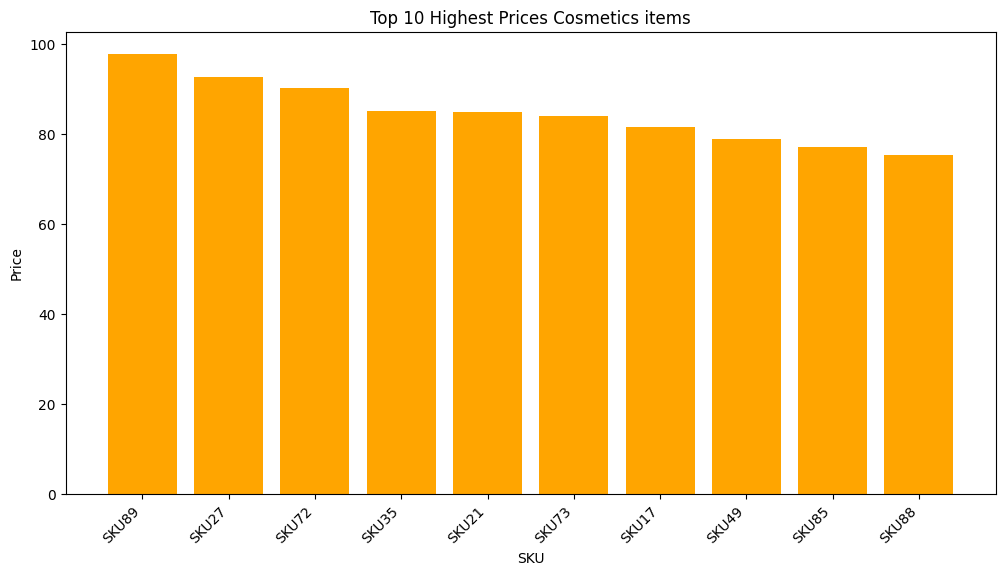

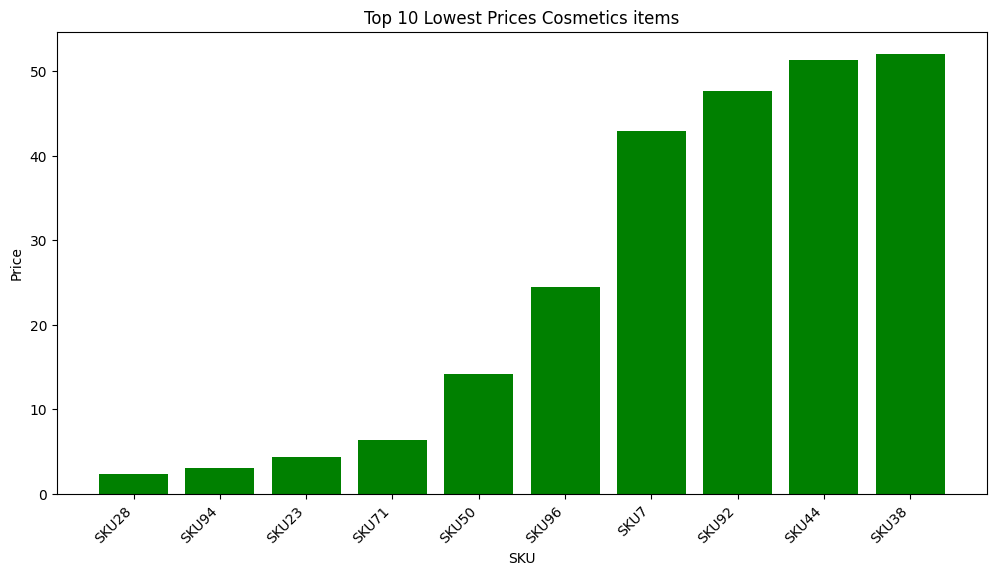

Top 10 highest Products Sold:
   Product type    SKU      Price  Number of products sold
94    cosmetics  SKU94   3.037689                      987
44    cosmetics  SKU44  51.355791                      919
91    cosmetics  SKU91  62.111965                      916
88    cosmetics  SKU88  75.270407                      737
38    cosmetics  SKU38  52.075931                      705
71    cosmetics  SKU71   6.381533                      637
50    cosmetics  SKU50  14.203484                      633
33    cosmetics  SKU33  64.795435                      616
21    cosmetics  SKU21  84.893869                      601
59    cosmetics  SKU59  63.828398                      484
Top 10 lowest Products Sold:
   Product type    SKU      Price  Number of products sold
85    cosmetics  SKU85  76.962994                       25
49    cosmetics  SKU49  78.897913                       99
17    cosmetics  SKU17  81.462534                      126
89    cosmetics  SKU89  97.760086                      1

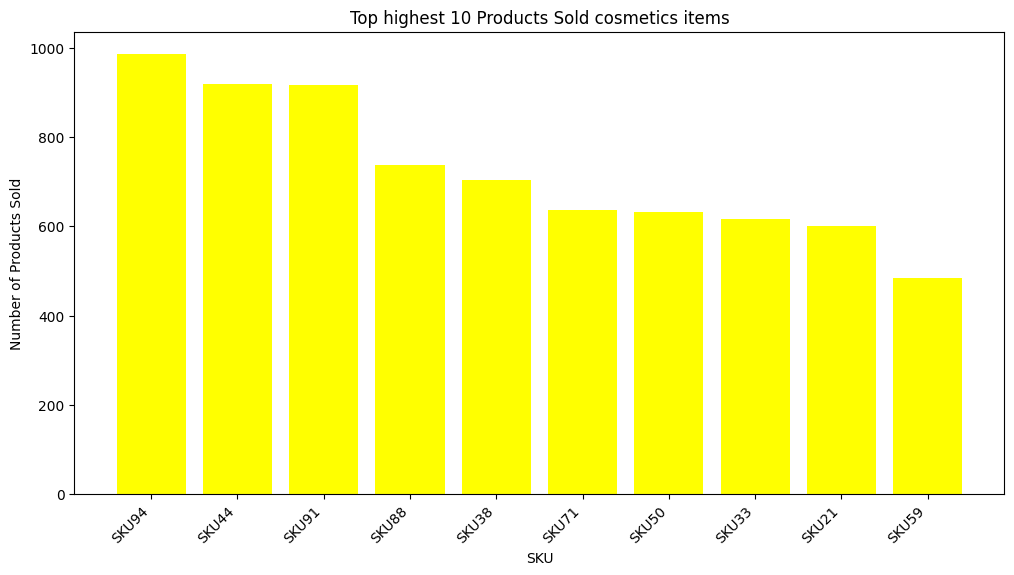

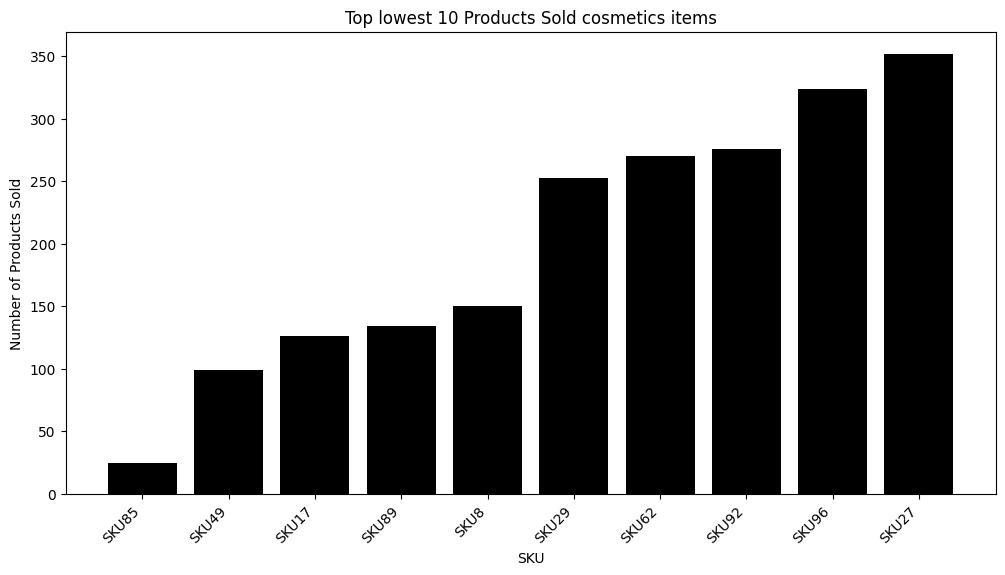


Top 10 Highest Revenue-Generating Products:
   Product type    SKU  Revenue generated
38    cosmetics  SKU38        9692.318040
88    cosmetics  SKU88        9444.742033
23    cosmetics  SKU23        8858.367571
85    cosmetics  SKU85        8684.613059
7     cosmetics   SKU7        8496.103813
29    cosmetics  SKU29        8318.903195
71    cosmetics  SKU71        8180.337085
49    cosmetics  SKU49        8001.613207
73    cosmetics  SKU73        7910.886916
94    cosmetics  SKU94        7888.356547


Top 10 Lowest Revenue-Generating Products:
   Product type    SKU  Revenue generated
59    cosmetics  SKU59        1061.618523
91    cosmetics  SKU91        1935.206794
92    cosmetics  SKU92        2100.129755
17    cosmetics  SKU17        2629.396435
72    cosmetics  SKU72        2633.121981
27    cosmetics  SKU27        2686.457224
62    cosmetics  SKU62        3899.746834
33    cosmetics  SKU33        5149.998350
50    cosmetics  SKU50        5910.885390
89    cosmetics  SKU89      

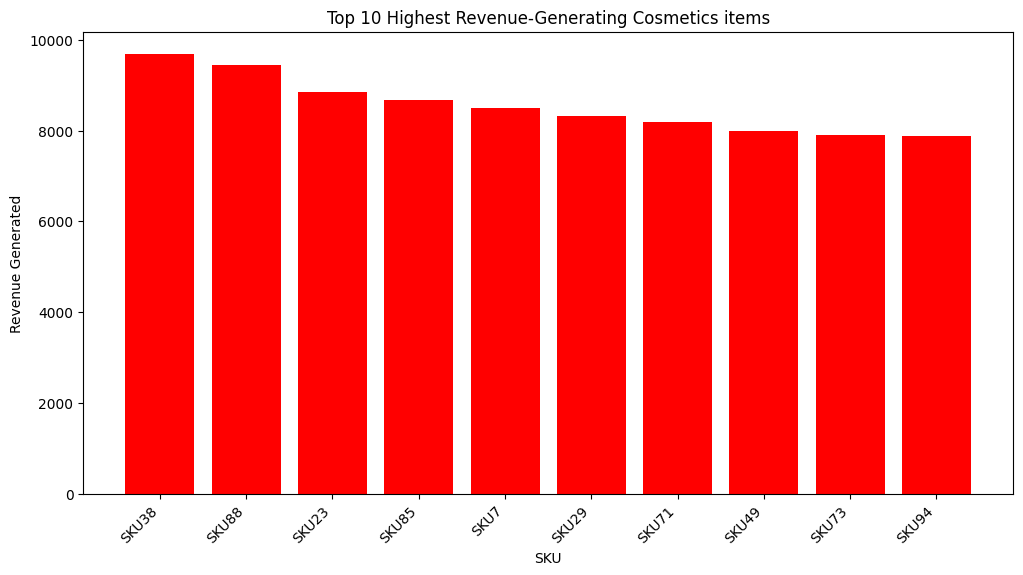

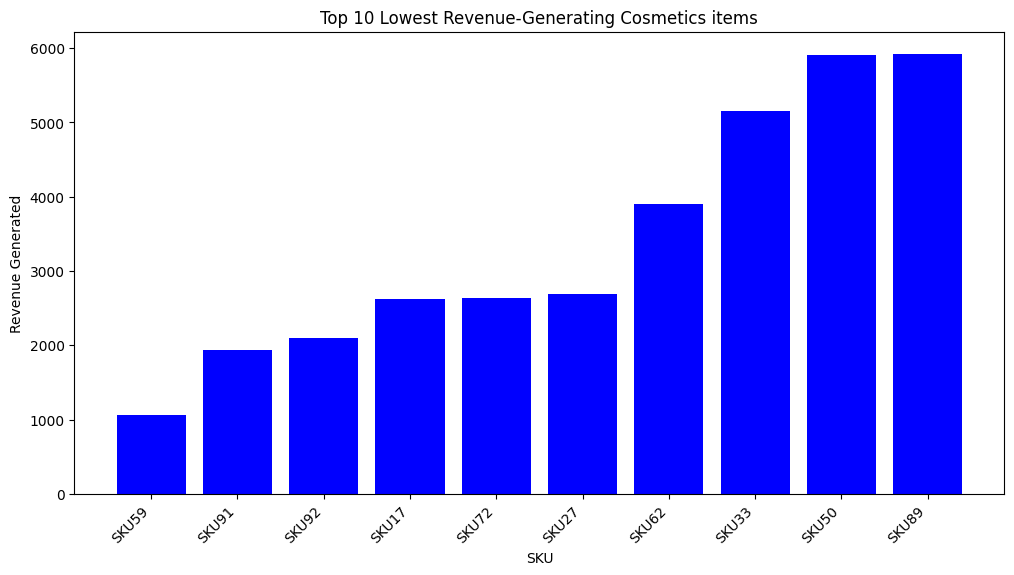

In [64]:
def analyze_cosmetics_products(df):
    # Using boolean indexing to filter rows where 'Product type' is 'cosmetics'
    cosmetics_df = df[df['Product type'] == 'cosmetics']

    # Grouping by 'Product type' and counting the number of unique SKUs for each group
    count_of_products_by_type = cosmetics_df.groupby('Product type')['SKU'].count()

    # Get the count as an integer
    number_of_items = count_of_products_by_type.values[0]

    # Number of items
    print(f"Number of Cosmetics items = {number_of_items}")

    # Find the highest and lowest prices for cosmetics products
    highest_price_item = cosmetics_df.loc[cosmetics_df['Price'].idxmax()]
    lowest_price_item = cosmetics_df.loc[cosmetics_df['Price'].idxmin()]

    # Display the results
    print("\nHighest Price Item:")
    print(f"Product Type: {highest_price_item['Product type']}")
    print(f"SKU: {highest_price_item['SKU']}")
    print(f"Price: ${highest_price_item['Price']:.2f}")

    print("\n" + "="*30 + "\n")  # Separating the results

    print("Lowest Price Item:")
    print(f"Product Type: {lowest_price_item['Product type']}")
    print(f"SKU: {lowest_price_item['SKU']}")
    print(f"Price: ${lowest_price_item['Price']:.2f}")

    # Top 10 highest prices
    top_10_highest_prices = cosmetics_df.nlargest(10, 'Price')

    # Bottom 10 lowest prices
    bottom_10_lowest_prices = cosmetics_df.nsmallest(10, 'Price')

    # Display the results
    print("\nTop 10 Highest Prices:")
    print(top_10_highest_prices[['Product type', 'SKU', 'Price']])

    print("\nBottom 10 Lowest Prices:")
    print(bottom_10_lowest_prices[['Product type', 'SKU', 'Price']])

    # Find the top 10 highest and lowest prices along with their associated products
    top_10_highest_prices = cosmetics_df.nlargest(10, 'Price')
    top_10_lowest_prices = cosmetics_df.nsmallest(10, 'Price')

    # Plot bar chart for top 10 highest prices
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_highest_prices['SKU'], top_10_highest_prices['Price'], color='orange')
    plt.title('Top 10 Highest Prices Cosmetics items')
    plt.xlabel('SKU')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Plot bar chart for top 10 lowest prices
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_lowest_prices['SKU'], top_10_lowest_prices['Price'], color='green')
    plt.title('Top 10 Lowest Prices Cosmetics items')
    plt.xlabel('SKU')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()


    ###########################################################################
    # Find the top 10 products based on the number of items sold
    Highest_10_products_sold = cosmetics_df.nlargest(10, 'Number of products sold')
    # Display the result
    print("Top 10 highest Products Sold:")
    print(Highest_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])

    # Find the lowest  10 products based on the number of items sold
    lowest_10_products_sold = cosmetics_df.nsmallest(10, 'Number of products sold')
    # Display the result
    print("Top 10 lowest Products Sold:")
    print(lowest_10_products_sold[['Product type', 'SKU', 'Price','Number of products sold']])



    # Find the top 10 products based on the number of items sold
    top_10_products_sold = cosmetics_df.nlargest(10, 'Number of products sold')

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_products_sold['SKU'], top_10_products_sold['Number of products sold'], color='yellow')
    plt.title('Top highest 10 Products Sold cosmetics items')
    plt.xlabel('SKU')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Find the lowest 10 products based on the number of items sold
    lowest_10_products_sold = cosmetics_df.nsmallest(10, 'Number of products sold')

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(lowest_10_products_sold['SKU'], lowest_10_products_sold['Number of products sold'], color='black')
    plt.title('Top lowest 10 Products Sold cosmetics items')
    plt.xlabel('SKU')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45, ha='right')
    plt.show()
   ###########################################################################

    # Find the top 10 highest and lowest revenue-generating items for cosmetics products
    top_10_highest_revenue = cosmetics_df.nlargest(10, 'Revenue generated')
    top_10_lowest_revenue = cosmetics_df.nsmallest(10, 'Revenue generated')

    # Display the results for the top 10 highest revenue
    print("\nTop 10 Highest Revenue-Generating Products:")
    print(top_10_highest_revenue[['Product type', 'SKU', 'Revenue generated']])
    print("\n" + "="*30 + "\n")  # Separating the results

    # Display the results for the top 10 lowest revenue
    print("Top 10 Lowest Revenue-Generating Products:")
    print(top_10_lowest_revenue[['Product type', 'SKU', 'Revenue generated']])

    # Plot bar chart for top 10 highest revenue
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_highest_revenue['SKU'], top_10_highest_revenue['Revenue generated'], color='red')
    plt.title('Top 10 Highest Revenue-Generating Cosmetics items')
    plt.xlabel('SKU')
    plt.ylabel('Revenue Generated')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Plot bar chart for top 10 lowest revenue
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_lowest_revenue['SKU'], top_10_lowest_revenue['Revenue generated'], color='blue')
    plt.title('Top 10 Lowest Revenue-Generating Cosmetics items')
    plt.xlabel('SKU')
    plt.ylabel('Revenue Generated')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Call the function to analyze cosmetics products
analyze_cosmetics_products(df)
